# Linear Regression Using Gradient Descent

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Calculate RMSE

In [60]:
def rmse(y_pred, y_act):
 
    n = len(y_act)
    rmse = np.sqrt((np.sum((y_act - y_pred) ** 2) / n)) 

    return rmse 

## Using Gradient Descent Method

In [61]:
def gradient_descent(X_train, X_test, y_train, y_test, epochs, l_rate):
    
    theta = np.zeros((X_train.shape[1], 1))
    m = len(X_train)
    train_rmse = []
    test_rmse = []
    h_train = X_train @ theta


    for i in range(epochs):
        theta = theta - (1 / m) * l_rate * (X_train.T @ (h_train - y_train))
        h_train = X_train @ theta
        h_test = X_test @ theta

        train_rmse.append(rmse(h_train, y_train))
        test_rmse.append(rmse(h_test, y_test))
    
    print(theta)

    return train_rmse, test_rmse


## Load Headbrain Data

In [59]:
dataset = pd.read_csv('headbrain.csv')

X = dataset['Head Size(cm^3)'].values
X = np.apply_along_axis(lambda c: (c - c.min())/(c.max() - c.min()), 0, X)
y = dataset['Brain Weight(grams)'].values
y = np.apply_along_axis(lambda c: (c - c.min())/(c.max() - c.min()), 0, y)
y = np.reshape(y, (len(y), 1))

one = np.ones(len(X))

X = np.vstack((one, X)).T

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
itr = 5000
l_rate = 0.001
train_rmse, test_rmse = gradient_descent(X_train, X_test, y_train, y_test, itr, l_rate)
itr = np.arange(itr)

[[0.36869324]
 [0.26086599]]


## Plot Epochs Vs RMSE

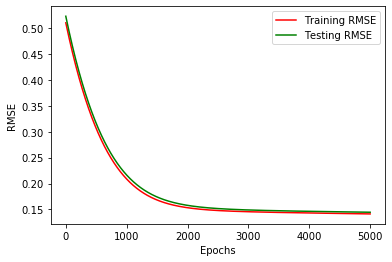

In [63]:
plt.plot(itr, train_rmse, c='red', label='Training RMSE')
plt.plot(itr, test_rmse, c='green', label='Testing RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()